<a href="https://colab.research.google.com/github/choius0528/Machine-Learning_Study/blob/main/4%EC%A3%BC%EC%B0%A8/ML_w4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 화이트와인 데이터 활용하기
1. 디시전 트리
2. 랜덤 포레스트
3. 로지스틱 회귀
4. KNN

화이트와인 데이터를 가져오기

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-white.csv', sep=";")

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [15]:
X = df.drop(columns=["quality"])
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. 디시전 트리

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
from sklearn.metrics import classification_report, accuracy_score

dt_y_pred = dt.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)

print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))


=== DT Test Accuracy ===
Decision Tree : 0.5908
[[  0   1   2   1   0   0   0]
 [  0   9  14   8   1   1   0]
 [  0  15 174  81  14   7   0]
 [  1  12  81 275  62   9   0]
 [  0   1  15  55 100   5   0]
 [  0   1   1   6   6  21   0]
 [  0   0   0   0   1   0   0]]


# 2. 랜덤 포레스트

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train_scaled, y_train)

rf_ly_preds_scaled = rf_model.predict(X_test_scaled)

print(mean_squared_error(y_test, rf_ly_preds_scaled))

0.38337979591836735


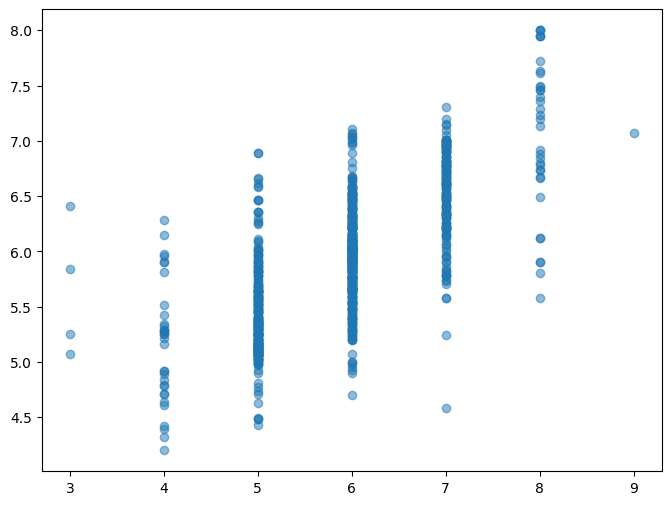

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_ly_preds_scaled, alpha=0.5)
plt.show()

#3.로지스틱 회귀

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 로지스틱 회귀 모델 초기화
logreg = LogisticRegression(random_state=42, max_iter=1000)

# 스케일링된 데이터로 모델 학습
logreg.fit(X_train_scaled, y_train)

# 예측
logreg_y_pred = logreg.predict(X_test_scaled)

# 평가
logreg_acc = accuracy_score(y_test, logreg_y_pred)

print("=== Logistic Regression Test Accuracy ===")
print(f"Logistic Regression : {logreg_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, logreg_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, logreg_y_pred))

=== Logistic Regression Test Accuracy ===
Logistic Regression : 0.5490

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.50      0.06      0.11        33
           5       0.59      0.53      0.56       291
           6       0.53      0.76      0.63       440
           7       0.56      0.27      0.37       176
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.55       980
   macro avg       0.31      0.23      0.24       980
weighted avg       0.53      0.55      0.52       980


Confusion Matrix:
[[  0   0   1   3   0   0   0]
 [  0   2  19  12   0   0   0]
 [  0   1 153 134   3   0   0]
 [  0   1  78 335  26   0   0]
 [  0   0   6 122  48   0   0]
 [  0   0   3  25   7   0   0]
 [  0   0   0   0   1   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 4. KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# KNN 모델 초기화
knn = KNeighborsClassifier()

# 스케일링된 데이터로 모델 학습
knn.fit(X_train_scaled, y_train)

# 예측
knn_y_pred = knn.predict(X_test_scaled)

# 평가
knn_acc = accuracy_score(y_test, knn_y_pred)

print("=== KNN Test Accuracy ===")
print(f"KNN : {knn_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, knn_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))

=== KNN Test Accuracy ===
KNN : 0.5265

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.30      0.18      0.23        33
           5       0.53      0.53      0.53       291
           6       0.54      0.62      0.57       440
           7       0.53      0.43      0.48       176
           8       0.50      0.26      0.34        35
           9       0.00      0.00      0.00         1

    accuracy                           0.53       980
   macro avg       0.34      0.29      0.31       980
weighted avg       0.52      0.53      0.52       980


Confusion Matrix:
[[  0   0   2   2   0   0   0]
 [  0   6  14  12   1   0   0]
 [  0   7 153 118  13   0   0]
 [  0   6 113 272  44   5   0]
 [  0   0   8  88  76   4   0]
 [  0   1   1  15   9   9   0]
 [  0   0   0   1   0   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
